In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def calculate_ci(data, z=1.96):
    mean = np.mean(data)
    stdev = np.std(data)
    interval = z * stdev / np.sqrt(len(data))
    return round(mean - interval, 2), round(mean+interval,2)

def get_price(ci, memory, unit_price):
    price = memory * unit_price / 128
    return ci[0] * price, ci[1]*price

In [4]:
node_js = pd.read_csv('Data/MEM128_CI.csv', dtype={'Duration':'float'})
node_12 = pd.read_csv('Data/ARM_NodeJS12.X_CI.csv', dtype={'Duration':'float'})
node_18 = pd.read_csv('Data/ARM_NodeJS18.X_CI.csv', dtype={'Duration':'float'})
arm = pd.read_csv('Data/ARM_NodeJS14.X_CI.csv', dtype={'Duration':'float'})
mem_192 = pd.read_csv('Data/MEM192_CI.csv', dtype={'Duration':'float'})
mem_256 = pd.read_csv('Data/MEM256_CI.csv', dtype={'Duration':'float'})
mem_512 = pd.read_csv('Data/MEM512_CI.csv', dtype={'Duration':'float'})
python = pd.read_csv('Data/Python_CI.csv', dtype={'Duration':'float'})
best = pd.read_csv('Data/ARM_NodeJS14.X_MEM192.csv', dtype={'Duration':'float'})


In [5]:
nodejs_duration = node_js.iloc[0:64]['Duration']
python_duration = python.iloc[0:64]['Duration']

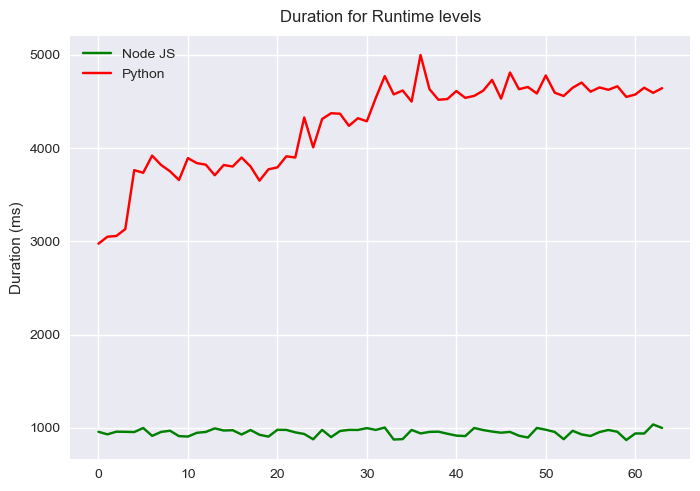

In [6]:
# Comparing Runtime
plt.style.use('seaborn')
fig = plt.figure()
plt.plot(nodejs_duration, label='Node JS', color='g')
plt.plot(python_duration, label='Python', color='red')
plt.legend()
plt.title('Duration for Runtime levels', pad=10)
plt.ylabel("Duration (ms)");
fig.savefig('Figures/runtime.eps',bbox_inches='tight', pad_inches=0)

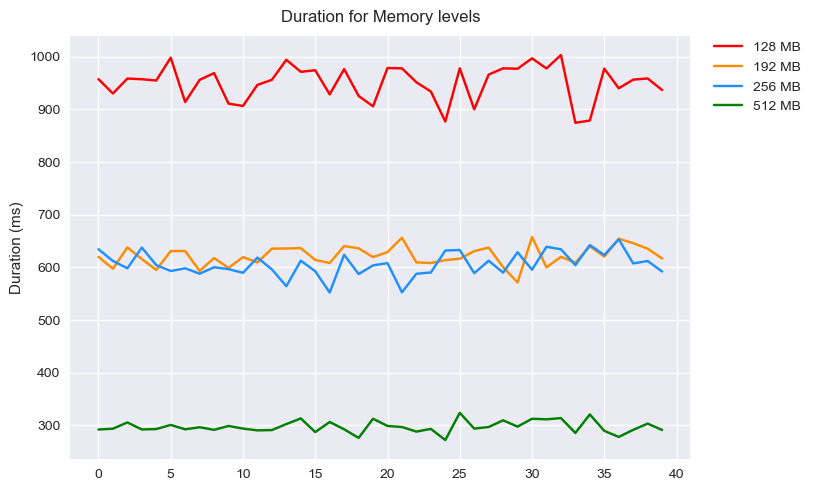

In [7]:
# Comparing memory levels

fig = plt.figure()
indices = range(min(len(mem_192), len(mem_256), len(mem_512)))
plt.plot(node_js.iloc[indices]['Duration'], label='128 MB', color='r')
plt.plot(mem_192.iloc[indices]['Duration'], label='192 MB', color='DarkOrange')
plt.plot(mem_256.iloc[indices]['Duration'], label='256 MB', color='DodgerBlue')
plt.plot(mem_512.iloc[indices]['Duration'], label='512 MB', color='g')
plt.legend(bbox_to_anchor=(1.03, 1), loc=2, borderaxespad=0.)
plt.title('Duration for Memory levels', pad= 10)
plt.ylabel('Duration (ms)');
fig.savefig('Figures/mem.eps',bbox_inches='tight', pad_inches=0)


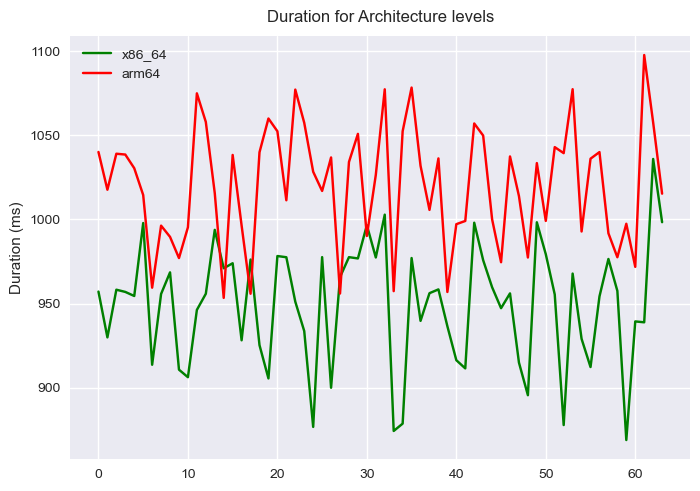

In [8]:
# Comparing architecture levels

fig = plt.figure()
plt.plot(nodejs_duration, label='x86_64', color='g')
plt.plot(arm['Duration'], label='arm64', color='red')
plt.legend()
plt.title('Duration for Architecture levels', pad=10)
plt.ylabel("Duration (ms)");
fig.savefig('Figures/arch.eps',bbox_inches='tight', pad_inches=0)

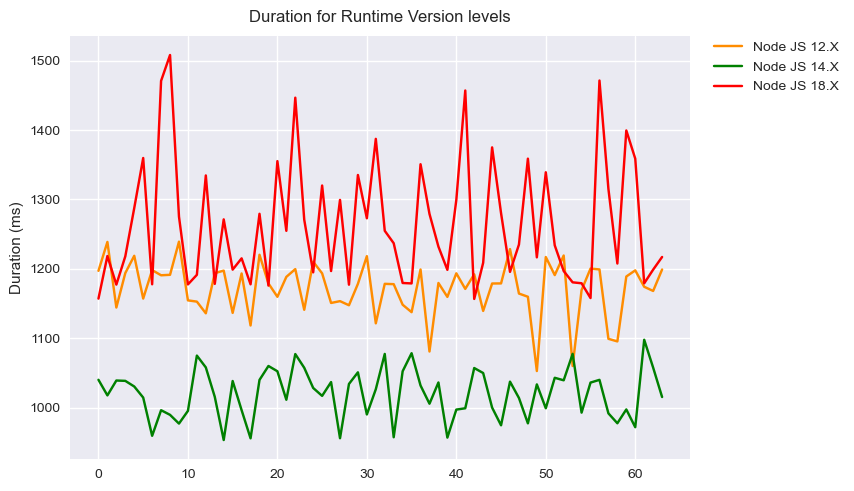

In [9]:
# Comparing runtime version levels

fig = plt.figure()
indices = range(min(len(mem_192), len(mem_256), len(mem_512)))
plt.plot(node_12['Duration'], label='Node JS 12.X', color='DarkOrange')
plt.plot(arm['Duration'], label='Node JS 14.X', color='g')
plt.plot(node_18['Duration'], label='Node JS 18.X', color='r')
plt.legend(bbox_to_anchor=(1.03, 1), loc=2, borderaxespad=0.)
plt.title('Duration for Runtime Version levels', pad= 10)
plt.ylabel('Duration (ms)');
fig.savefig('Figures/runtime_version.eps',bbox_inches='tight', pad_inches=0)

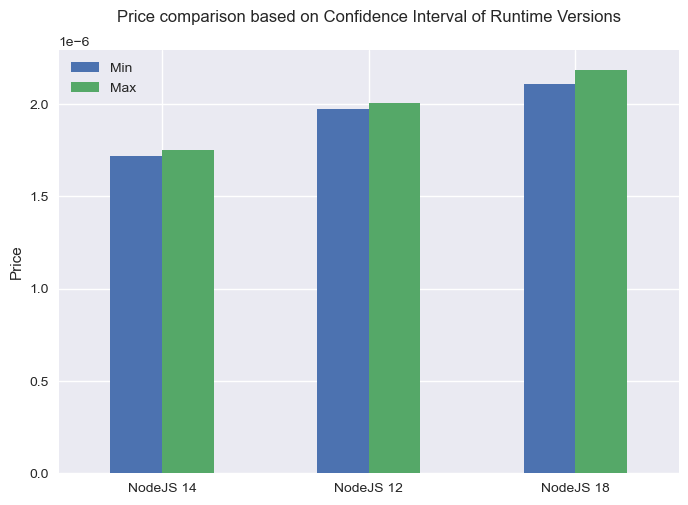

In [38]:
arm_price = 0.0000000017

node12_price = get_price(calculate_ci(node_12['Duration']), 128, arm_price)
node14_price = get_price(calculate_ci(arm['Duration']), 128, arm_price)
node18_price = get_price(calculate_ci(node_18['Duration']), 128, arm_price)
price_df = pd.DataFrame({'Min':[node12_price[0], node14_price[0], node18_price[0]], 
'Max':[node12_price[1], node14_price[1], node18_price[1]]
}, index=['NodeJS 12', 'NodeJS 14', 'NodeJS 18']).sort_values(by='Max')

ax = price_df.plot.bar(rot=0)
ax.set_title('Price comparison based on Confidence Interval of Runtime Versions', pad=20)
ax.set_ylabel('Price');
ax.get_figure().savefig('Figures/price_version.eps',bbox_inches='tight', pad_inches=0)

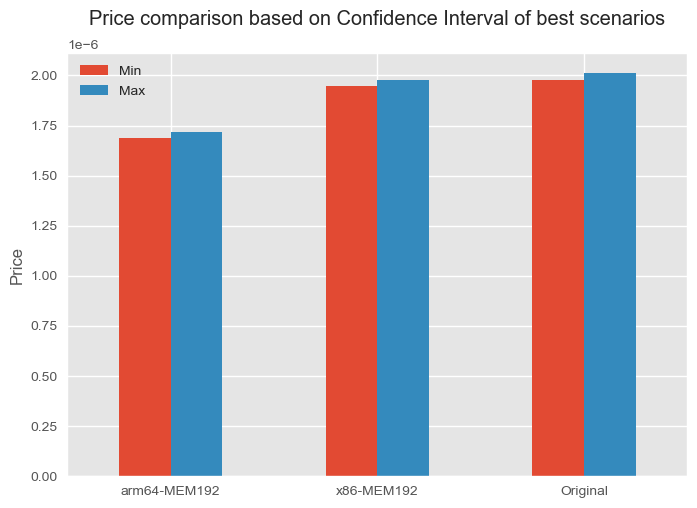

In [36]:
plt.style.use('ggplot')
x86_price = 0.0000000021
original_price = get_price(calculate_ci(nodejs_duration), 128, x86_price)
mem192_price = get_price(calculate_ci(mem_192['Duration']), 192, x86_price)
best_price = get_price(calculate_ci(best['Duration']), 192, arm_price)

price_df = pd.DataFrame({'Min':[original_price[0], mem192_price[0], best_price[0]], 
'Max':[original_price[1], mem192_price[1], best_price[1]]
}, index=['Original', 'x86-MEM192', 'arm64-MEM192']).sort_values(by='Max')

ax = price_df.plot.bar(rot=0)
ax.set_title('Price comparison based on Confidence Interval of best scenarios', pad=20)
ax.set_ylabel('Price');
ax.get_figure().savefig('Figures/price_best.eps',bbox_inches='tight', pad_inches=0)

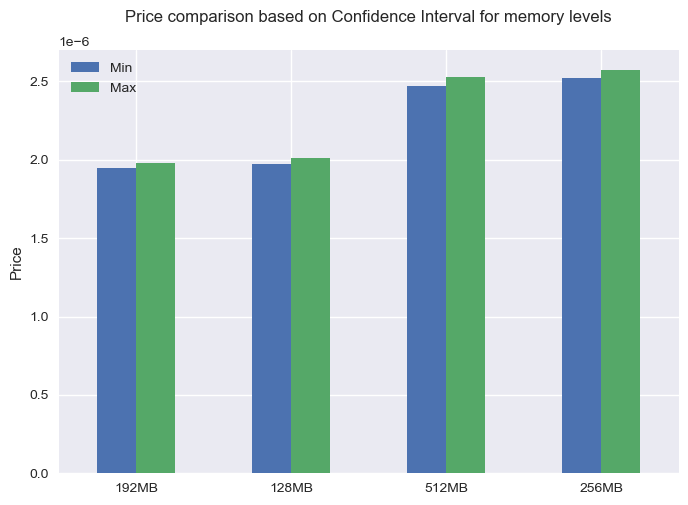

In [37]:
plt.style.use('seaborn')

x86_price = 0.0000000021

original_price = get_price(calculate_ci(nodejs_duration), 128, x86_price)
mem192_price = get_price(calculate_ci(mem_192['Duration']), 192, x86_price)
mem256_price = get_price(calculate_ci(mem_256['Duration']), 256, x86_price)
mem512_price = get_price(calculate_ci(mem_512['Duration']), 512, x86_price)

price_df = pd.DataFrame({'Min':[original_price[0], mem192_price[0], mem256_price[0], mem512_price[0]], 
'Max':[original_price[1], mem192_price[1], mem256_price[1], mem512_price[1]]
}, index=['128MB', '192MB', '256MB', '512MB']).sort_values(by='Max')

ax = price_df.plot.bar(rot=0)
ax.set_title('Price comparison based on Confidence Interval for memory levels', pad=20)
ax.set_ylabel('Price');
ax.get_figure().savefig('Figures/price_mem.eps',bbox_inches='tight', pad_inches=0)